# Explore the Data

Let us build some intuition around the Loan Data

In [13]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Default Variables
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['font.size'] = 18
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [40]:
#Load the dataset
df = pd.read_csv("data/loan_data_clean.csv")

In [46]:
df.head()

,default,amount,interest,grade,years,ownership,income,age,amount_non_default
0,0,5000,10.65,B,10.00,RENT,24000.00,33,5000
1,0,2400,10.99,C,25.00,RENT,12252.00,31,2400
2,0,10000,13.49,C,13.00,RENT,49200.00,24,10000
3,0,5000,10.99,A,3.00,RENT,36000.00,39,5000
4,0,3000,10.99,E,9.00,RENT,48000.00,24,3000


In [49]:
# create the target "amount * default'
df['amount_non_default'] = df['amount'] * (1- df['default'])

## Single Variable Exploration

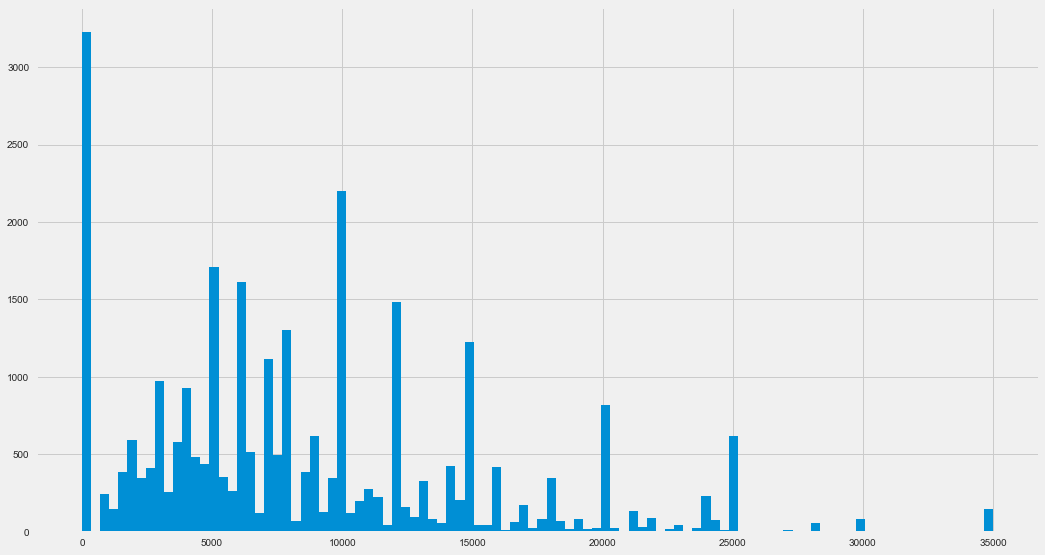

In [51]:
# Create histogram for the target variable
df['amount_non_default'].hist(bins = 100)

In [ ]:
# Explore other variables

##  Dual Variable Exploration

In [57]:
df.dtypes

default                 int64
amount                  int64
interest              float64
grade                  object
years                 float64
ownership              object
income                float64
age                     int64
amount_non_default      int64
dtype: object

In [56]:
# Create a crosstab of grade and amount_non_default
pd.crosstab(df.grade, df.amount_non_default)

amount_non_default,0,500,700,725,750,800,900,950,1000,1050,...,31825,32000,32400,32500,33000,33250,33950,34000,34800,35000
grade,,,,,,,,,,,,,,,,,,,,,
A,565,1,0,1,0,1,1,0,88,2,...,1,4,1,0,0,0,1,0,0,43
B,985,3,0,0,0,0,0,1,83,0,...,1,3,0,1,2,0,0,2,0,36
C,844,1,1,0,1,0,0,0,48,1,...,0,0,0,0,1,1,0,1,0,26
D,580,0,0,0,0,0,0,0,19,0,...,0,0,0,0,0,0,1,1,0,30
E,176,0,0,0,0,0,0,0,3,0,...,0,1,0,0,1,0,0,0,1,12
F,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore the impact of `age`  with `amount_non_default`

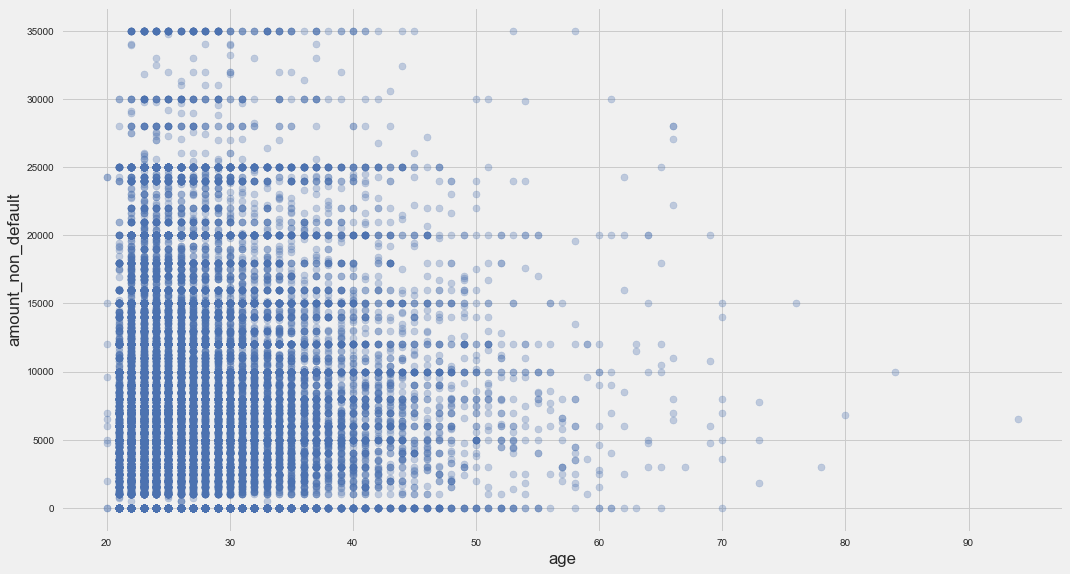

In [60]:
df.plot(kind="scatter", x = "age", y = "amount_non_default", s = 50, alpha = 0.3 )

### Explore the impact of `interest` with `amount_non_default`

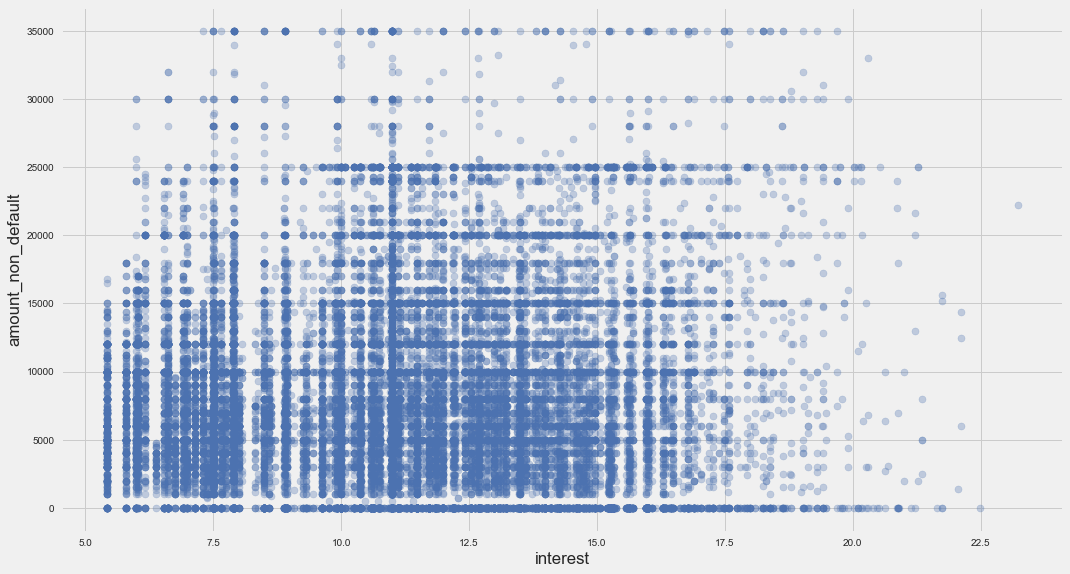

In [61]:
df.plot(kind="scatter", x = "interest", y = "amount_non_default", s = 50, alpha = 0.3 )

### Explore the impact of `income` with `amount_non_default`

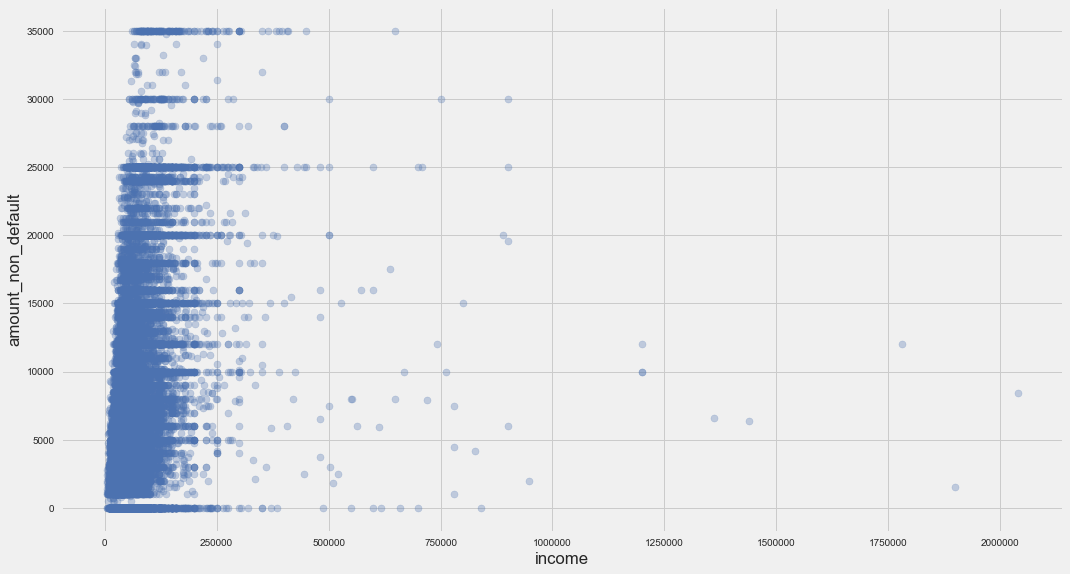

In [62]:
df.plot(kind="scatter", x = "income", y = "amount_non_default", s = 50, alpha = 0.3 )

In [64]:
# Transform the income variable
df['income_log'] = np.log(df['income'])

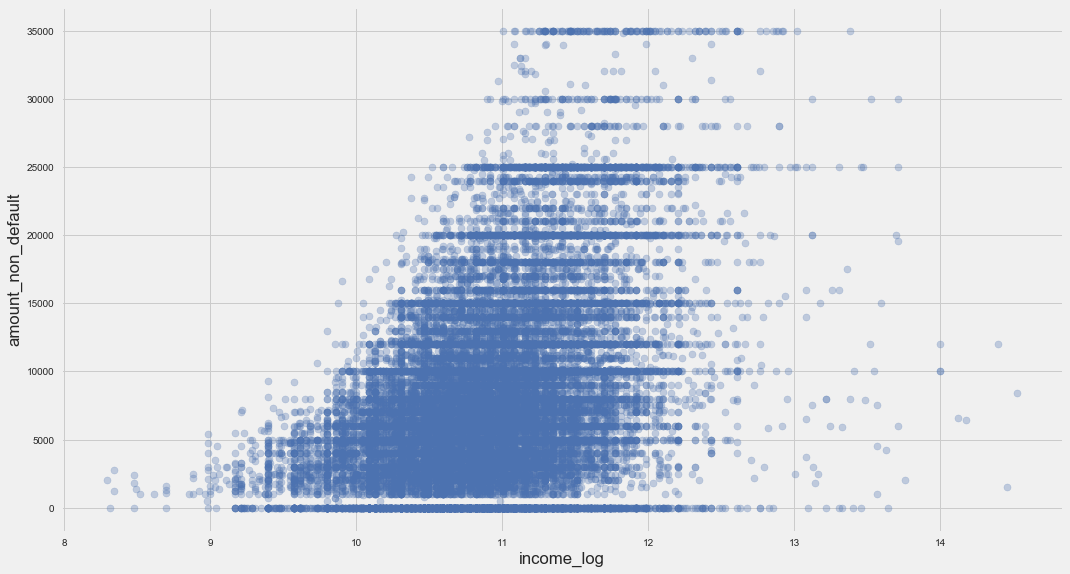

In [65]:
df.plot(kind="scatter", x = "income_log", y = "amount_non_default", s = 50, alpha = 0.3 )

### Explore the impact of `years` with `amount_non_default`

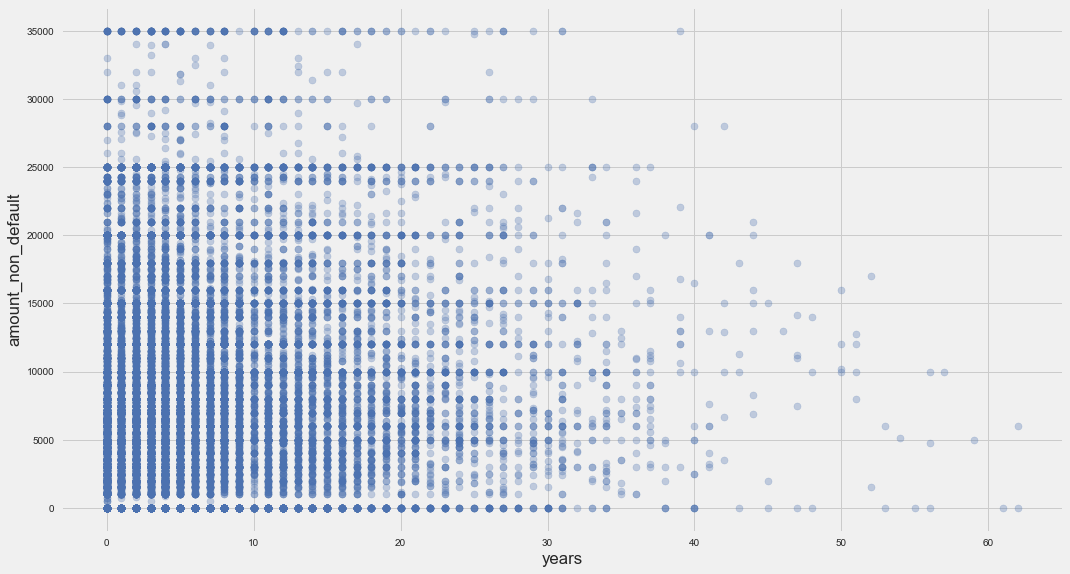

In [66]:
df.plot(kind="scatter", x = "years", y = "amount_non_default", s = 50, alpha = 0.3 )

### Explore the impact of `grade` with `amount_non_default`

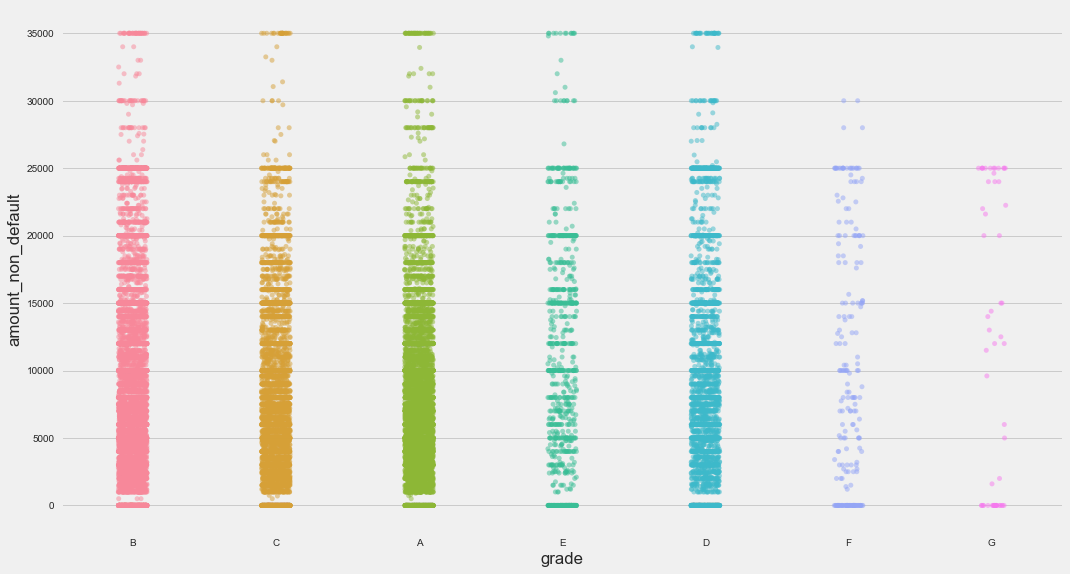

In [73]:
sns.stripplot(data=df, x="grade", y="amount_non_default", jitter=True, alpha =0.5)

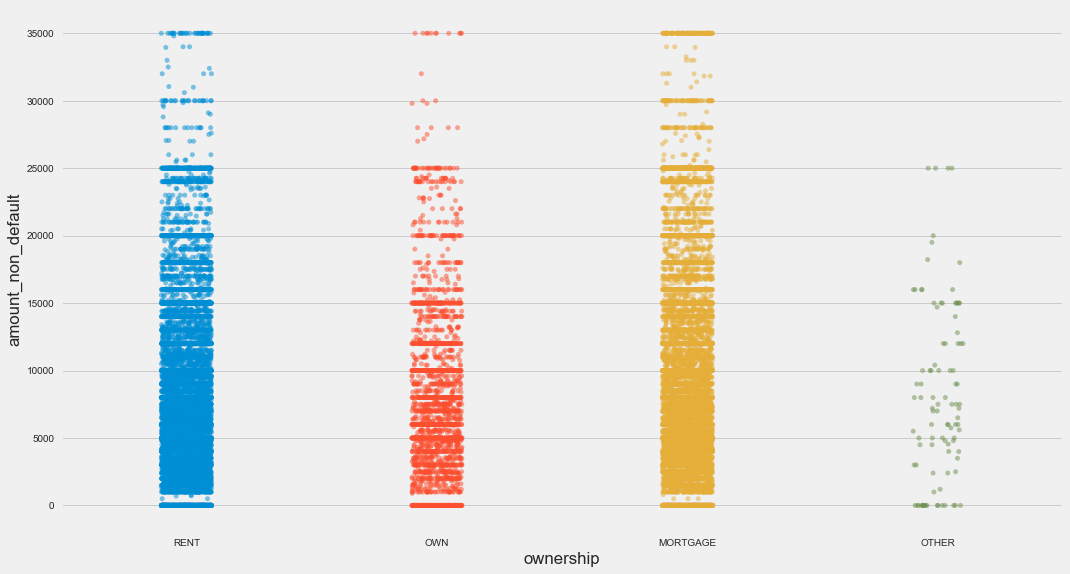

In [72]:
sns.stripplot(data=df, x="ownership", y="amount_non_default", alpha=0.5, jitter=True)

## Three Variable Exploration

### Explore the relationship between `age`, `income` and `amount_non_default`

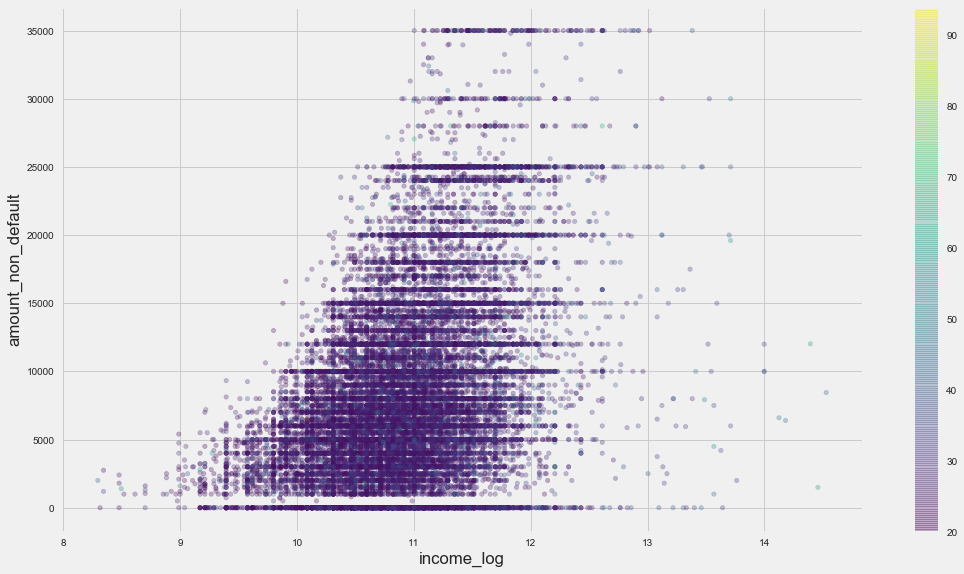

In [78]:
df.plot(kind="scatter", x = "income_log", y = "amount_non_default", c = df.age, 
        alpha = 0.3, cmap=plt.cm.viridis )

### Explore the relationship between plot `age`, `grade` and `amount_non_default`

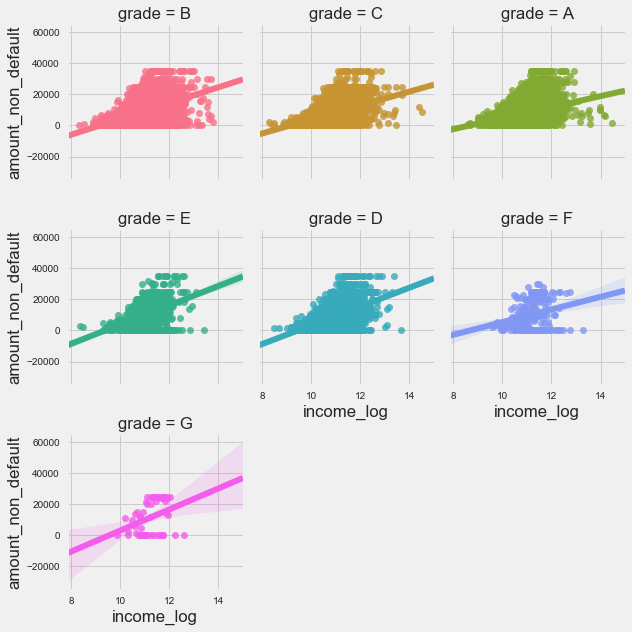

In [96]:
sns.lmplot(x = 'income_log', y = 'amount_non_default', hue='grade',
           col="grade", data=df, col_wrap=3, size=3)